# Sloan Digital Sky Survey which offers public data of space observations. As I found the data to be super insightful 
I want to share the data.

Content
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 
feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data 
and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun
at the March equinox to the hour circle of the point above the earth in question. When paired with declination 
(abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere 
(traditionally called in English the skies or the sky) in the equatorial coordinate system.

So here the class column is the target for classification. 
So based on the data we will predict whether it is a GALAXY/STAR/QSO.

# 1-Data Exploration (Reading the data and attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the skyserver data and print them
skyserver=pd.read_csv('skyserver.csv')
print(skyserver.shape)

print(skyserver.head(10))

(10000, 18)
          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   
5  1.237650e+18  183.847174  0.173694  19.43133  18.46779  18.16451  18.01475   
6  1.237650e+18  183.864379  0.019201  19.38322  17.88995  17.10537  16.66393   
7  1.237650e+18  183.900081  0.187473  18.97993  17.84496  17.38022  17.20673   
8  1.237650e+18  183.924588  0.097246  17.90616  16.97172  16.67541  16.53776   
9  1.237650e+18  183.973498  0.081626  18.67249  17.71375  17.49362  17.28284   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  75

In [3]:
#checking the information of the data and is there any null values present
skyserver.info()

#so here we saw non of the attribute has any missing value and only class attribute which is target having object datatype,
#so we will encode this for our analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


# 2-Exploratory Data Analysis (Exploring, Cleaning & Visualizing)

In [4]:
#lets see the data description
skyserver.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [5]:
#lets see what are the types of data are present in each attribute

for columns in skyserver:
    print("Column Name:",columns)
    print(np.unique(skyserver[columns], return_counts=True))
    print(skyserver[columns].value_counts())
    print("\n")

Column Name: objid
(array([1.23765e+18]), array([10000], dtype=int64))
1.237650e+18    10000
Name: objid, dtype: int64


Column Name: ra
(array([  8.2351005 ,   8.24596335,   8.29136717, ..., 260.8111888 ,
       260.8508975 , 260.8843818 ]), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))
226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64


Column Name: dec
(array([-5.3826325 , -5.37879369, -5.3719885 , ..., 68.53200681,
       68.54056693, 68.54226541]), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))
 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64


Column Name: u
(array([12.98897, 13.55178, 13.99371, ..., 19.59971, 19.59975, 19.5999 ]), array([1, 1, 1, ..., 1, 1, 

In [6]:
#lets see what are the columns and print those
print(skyserver.columns)

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')


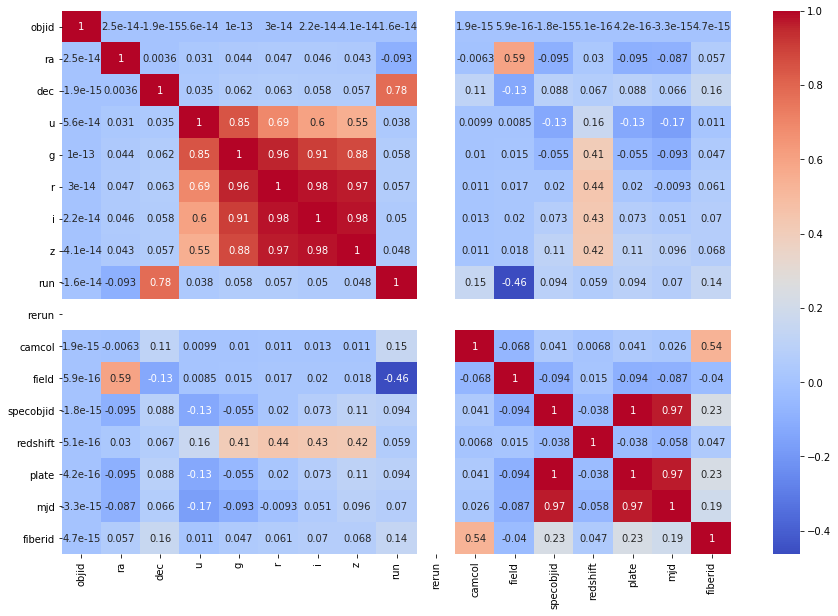

In [7]:
#lets see the corelation among data
plt.figure(figsize=(15,10))
sns.heatmap(skyserver.corr(),cmap='coolwarm',annot=True)


In [8]:
#Here objid and specobjid are just identifiers, 
#rerun also has no important role to find GALAXY/STAR/QSO
#so we will drop these columns from our dataset

skyserver=skyserver.drop(['objid','specobjid','rerun'],axis=1)
print(skyserver.shape)

(10000, 15)


In [9]:
#lets find what are the types of values are there in class attribute and their counts
print(np.unique(skyserver['class'], return_counts=True))
print('\n')
print(skyserver['class'].value_counts())

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([4998,  850, 4152], dtype=int64))


GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [10]:
# lets encode the class attribute values using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
skyserver['class']=le.fit_transform(skyserver['class'])
skyserver.head(10)

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,4,270,0,0.040508,288,52000,400


In [11]:
#again find what are the types of values are there in class attribute and their counts
print(np.unique(skyserver['class'], return_counts=True))
print('\n')
print(skyserver['class'].value_counts())

# so here GALAXY-->0, QSO-->1 and STAR-->2

(array([0, 1, 2]), array([4998,  850, 4152], dtype=int64))


0    4998
2    4152
1     850
Name: class, dtype: int64


# 3-Building Different Model and Finding the Best Model

In [13]:
#lets separating the input and output/target variables
x=skyserver.drop(columns=['class'])
y=skyserver[['class']]

print(x.shape)
print(y.shape)

(10000, 14)
(10000, 1)


In [14]:
#scaling the input variables using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,5))
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)

In [ ]:
#from sklearn import preprocessing
#y = preprocessing.label_binarize(y, classes=[0, 1, 2])

In [15]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(8000, 14) (2000, 14)
(8000, 1) (2000, 1)


In [16]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()

In [17]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier',ad))
models.append(('GradientBoostingClassifier',gd))

In [18]:
#lets import all the classification outputs
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [19]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.9485


Cross Value Score: 0.9494999999999999


Classification Report:               precision    recall  f1-score   support

           0       0.94      0.95      0.95       996
           1       0.99      0.93      0.96       190
           2       0.94      0.95      0.95       814

    accuracy                           0.95      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.95      0.95      0.95      2000



Confusion Matrix:
 [[949   1  46]
 [ 14 176   0]
 [ 42   0 772]]


************************ SVC **********************


SVC(C=1.0, 

In [20]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs})
print(result)

                        Model  Accuracy_Score  Cross_Value_Score
0          LogisticRegression           94.85              94.95
1                         SVC           90.20              90.62
2        KNeighborsClassifier           86.90              86.25
3      DecisionTreeClassifier           98.80              98.39
4                  GaussianNB           97.05              97.03
5               MultinomialNB           82.70              83.89
6      RandomForestClassifier           99.15              98.85
7          AdaBoostClassifier           77.40              86.43
8  GradientBoostingClassifier           99.30              98.94


In [ ]:
# So here GradientBoostingClassifier is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier 
gdbc=GradientBoostingClassifier()
parameters={'n_estimators':[200,500,1000],'learning_rate':[0.01,0.1,0.5,1.0]}
clf=GridSearchCV(gdbc, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

Accuracy Score is: 0.992
Cross Value Score: 0.9902
Confusion Matix:
 [[995   2   3]
 [  9 161   0]
 [  1   1 828]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.98      0.95      0.96       170
           2       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

AxesSubplot(0.125,0.808774;0.62x0.0712264)


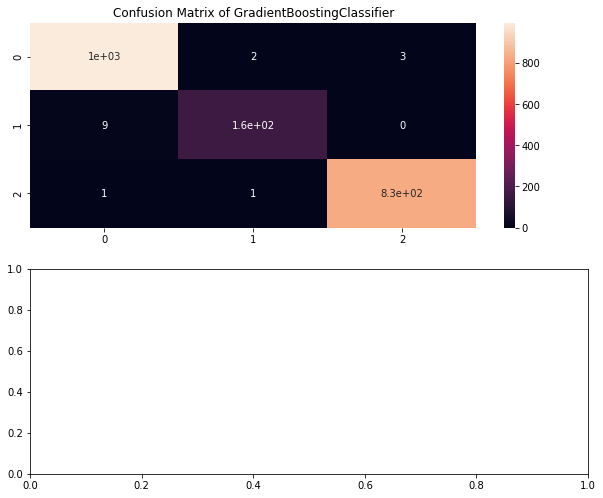

In [22]:
# So lets build the final model with n_estimators=500 and learning_rate=0.1

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
gdbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
gdbc.fit(x_train,y_train)
pred_gdbc=gdbc.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_gdbc))
print('Cross Value Score:', cross_val_score(gdbc, x,y,cv=10,scoring='accuracy').mean())
#false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_gdbc)
#print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_gdbc))
print('Classification Report:\n', classification_report(y_test,pred_gdbc))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_gdbc)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix of GradientBoostingClassifier')
print(sns.heatmap(cm,annot=True))
plt.subplot(912)

#lets print the roc auc curve
#roc_auc=auc(false_positive_rate,true_positive_rate)
#plt.title('ROC AUC Curve of GradientBoostingClassifier')
#plt.xlabel('false_positive_rate')
#plt.ylabel('true_positive_rate')
#plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
#plt.plot([0,1],[0,1],'r--')
#plt.legend(loc='lower right') 

In [23]:
#lets predict the income of census data
print('Actual GALAXY/STAR/QSO:\n',y_test)
print('Predicted GALAXY/STAR/QSO:\n',pred_gdbc)

Actual GALAXY/STAR/QSO:
       class
106       1
440       0
7271      2
5916      0
1942      0
...     ...
816       2
7503      0
9515      0
3120      0
6852      0

[2000 rows x 1 columns]
Predicted GALAXY/STAR/QSO:
 [1 0 2 ... 0 0 0]


In [24]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(gdbc,'gdbc_skyserver.obj')

['gdbc_skyserver.obj']

In [25]:
skyserver_from_joblib=joblib.load('gdbc_skyserver.obj')

In [26]:
#Use the loaded model to make predictions against test data
skyserver_from_joblib.predict(x_test)

array([1, 0, 2, ..., 0, 0, 0])

# Conclusion:
So here 'GradientBoostingClassifier Model' is the best model out of all model tested above and by looking this we 
can conclude that our model is predicting more than 99% of correct results for predicting whether it is a GALAXY/STAR/QSO.